# Linear Regression

In [153]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Preprocessing

### **Exploring the dataset**

Let's start with loading the training data from the csv into a pandas dataframe



Load the datasets from GitHub. Train dataset has already been loaded for you in df below. To get test dataset use the commented code.

In [154]:
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')

Let's see what the first 5 rows of this dataset looks like

In [155]:
df.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,Utilities,SalePrice
0,11553,1051,1159,336,0,5,AllPub,158000
1,8400,1052,1052,288,0,5,AllPub,138500
2,8960,1008,1028,360,0,6,AllPub,115000
3,11100,0,930,308,0,7,AllPub,84900
4,15593,1304,2287,667,0,4,AllPub,225000


What are all the features present? What is the range for each of the features along with their mean?

In [156]:
print("Features in the dataset:\n")
print(df.columns.tolist())

numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

print("=== Numeric Feature Summary (min, max, mean) ===\n")
display(df[numeric_cols].describe().loc[['min', 'max', 'mean']])

print("\n=== Categorical Feature Ranges (unique values) ===\n")
for col in categorical_cols:
    print(f"{col}:")
    print(df[col].unique())
    print()

Features in the dataset:

['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'OverallCond', 'Utilities', 'SalePrice']
=== Numeric Feature Summary (min, max, mean) ===



,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice
min,1300.000000,0.000000,334.000000,0.000000,0.000000,1.000000,34900.000000
max,215245.000000,6110.000000,5642.000000,1418.000000,738.000000,9.000000,755000.000000
mean,10622.104262,1058.311263,1512.900304,473.480213,2.643075,5.582192,180795.504566



=== Categorical Feature Ranges (unique values) ===

Utilities:
['AllPub' 'NoSeWa']



### **Feature Scaling and One-Hot Encoding**

You must have noticed that some features `(such as Utilities)` are not continuous values.
  
These features contain values indicating different categories and must somehow be converted to numbers so that the computer can understand it. `(Computers only understand numbers and not strings)`
  
These features are called categorical features. We can represent these features as a `One-Hot Representation`
  
  
You must have also noticed that all the other features, each are in a different scale. This can be detremental to the performance of our linear regression model and so we normalize them so that all of them are in the range $[0,1]$

> NOTE: When you are doing feature scaling, store the min/max which you will use to normalize somewhere. This is then to be used at testing time. Try to think why are doing this?

In [157]:
categorical_cols = ['Utilities']

# Perform One-Hot Encoding manually
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_NoSeWa
0,11553,1051,1159,336,0,5,158000,False
1,8400,1052,1052,288,0,5,138500,False
2,8960,1008,1028,360,0,6,115000,False
3,11100,0,930,308,0,7,84900,False
4,15593,1304,2287,667,0,4,225000,False


In [158]:
numeric_cols = ['LotArea', 'TotalBsmtSF', 'GrLivArea',
                'GarageArea', 'PoolArea', 'OverallCond']

# Store min and max so we can use them later during testing
feature_mins = df_encoded[numeric_cols].min()
feature_maxs = df_encoded[numeric_cols].max()

# Apply min-max scaling
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = (df_encoded[numeric_cols] - feature_mins) / (feature_maxs - feature_mins)

df_scaled.head()

# Scale SalePrice separately
target_min = df_encoded['SalePrice'].min()
target_max = df_encoded['SalePrice'].max()

df_scaled['SalePrice'] = (df_encoded['SalePrice'] - target_min) / (target_max - target_min)



### **Conversion to NumPy**

Ok so now that we have all preprocessed all the data, we need to convert it to numpy for our linear regression model
  
Assume that our dataset has a total of $N$ datapoints. Each datapoint having a total of $D$ features (after one-hot encoding), we want our numpy array to be of shape $(N, D)$

In our task, we have to predict the `SalePrice`. We will need 2 numpy arrays $

*   List item
*   List item

(X, Y)$. These represent the features and targets respectively

In [159]:
# Convert to numpy array
X = df_scaled.drop('SalePrice', axis=1).values     # (N, D)
Y = df_scaled['SalePrice'].values.reshape(-1, 1)   # (N, 1)

X = df_scaled.drop('SalePrice', axis=1).values
Y = df_scaled['SalePrice'].values.reshape(-1,1)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1314, 7)
Shape of Y: (1314, 1)


## Linear Regression formulation
  
We now have our data in the form we need. Let's try to create a linear model to get our initial (Really bad) prediction


Let's say a single datapoint in our dataset consists of 3 features $(x_1, x_2, x_3)$, we can pose it as a linear equation as follows:
$$ y = w_1x_1 + w_2x_2 + w_3x_3 + b $$
Here we have to learn 4 parameters $(w_1, w_2, w_3, b)$
  
  
Now how do we extend this to multiple datapoints?  
  
  
Try to answer the following:
- How many parameters will we have to learn in the cae of our dataset? (Don't forget the bias term)
- Form a linear equation for our dataset. We need just a single matrix equation which correctly represents all the datapoints in our dataset
- Implement the linear equation as an equation using NumPy arrays (Start by randomly initializing the weights from a standard normal distribution)

In [160]:
# Linear model initialization and forward pass (NumPy)

import numpy as np

# If you want reproducible random init
np.random.seed(42)

# Assume X is (N, D) and Y is (N, 1) from previous cell
N, D = X.shape

# Number of learnable parameters
num_parameters = D + 1  # D weights + 1 bias
print("Number of parameters to learn:", num_parameters)

# Initialize weights and bias from standard normal
W = np.random.randn(D, 1)   # shape (D, 1)
b = np.random.randn(1)      # shape (1,)

# Compute predictions for all N datapoints
y_pred = X @ W + b          # shape (N, 1) because (N,D)@(D,1) -> (N,1); b broadcasts

# Quick shape checks
print("X shape:", X.shape)
print("W shape:", W.shape)
print("b shape:", b.shape)
print("y_pred shape:", y_pred.shape)

# Show first 5 predicted values (optional)
print("First 5 predictions:\n", y_pred[:5].ravel())


Number of parameters to learn: 8
X shape: (1314, 7)
W shape: (7, 1)
b shape: (1,)
y_pred shape: (1314, 1)
First 5 predictions:
 [1.111941955759503 1.0399874542079728 1.0874206253711078
 1.0181224732432093 1.6380202812485751]


How well does our model perform? Try comparing our predictions with the actual values

In [161]:
# Compare our predictions with the actual values

# Compute Mean Squared Error (MSE)
mse = np.mean((y_pred - Y)**2)

print("Mean Squared Error (with random weights):", mse)

# Show a few predicted vs actual pairs
num_samples = 10
print("\nSample predictions:")
for i in range(num_samples):
    print(f"Predicted: {y_pred[i][0]:.4f},   Actual: {Y[i][0]:.4f}")


Mean Squared Error (with random weights): 1.2155031232695503

Sample predictions:
Predicted: 1.1119,   Actual: 0.1709
Predicted: 1.0400,   Actual: 0.1439
Predicted: 1.0874,   Actual: 0.1112
Predicted: 1.0181,   Actual: 0.0694
Predicted: 1.6380,   Actual: 0.2640
Predicted: 1.4543,   Actual: 0.2212
Predicted: 1.4693,   Actual: 0.1430
Predicted: 1.0789,   Actual: 0.1876
Predicted: 1.3209,   Actual: 0.1918
Predicted: 1.3401,   Actual: 0.1286


### **Learning weights using gradient descent**

So these results are really horrible. We need to somehow update our weights so that it correclty represents our data. How do we do that?

We must do the following:
- We need some numerical indication for our performance, for this we define a Loss Function ( $\mathscr{L}$ )
- Find the gradients of the `Loss` with respect to the `Weights`
- Update the weights in accordance to the gradients: $W = W - \alpha\nabla_W \mathscr{L}$

Lets define the loss function:
- We will use the MSE loss since it is a regression task. (Specify the assumptions we make while doing so as taught in the class).
- Implement this loss as a function. (Use numpy as much as possible)

In [162]:
# Mean Squared Error Loss Function

def mse_loss_fn(y_true, y_pred):
    """
    Computes the Mean Squared Error (MSE) loss.

    Assumptions when using MSE:
    - Error terms follow a Gaussian distribution with mean 0.
    - Large errors should be penalized more heavily (because of the squared term).
    - Linear model tries to minimize squared deviations between predictions and truth.
    """

    # N is number of datapoints
    N = y_true.shape[0]

    # MSE = (1/N) * Σ (y_pred - y_true)^2
    loss = np.sum((y_pred - y_true) ** 2) / N

    return loss


Calculate the gradients of the loss with respect to the weights (and biases). First write the equations down on a piece of paper, then proceed to implement it

In [163]:
def get_gradients(y_true, y_pred, W, b, X):
    """
    Calculates the gradients for the MSE loss function with respect to the
    weights (W) and bias (b).

    Args:
        y_true: True target values, shape (N, 1)
        y_pred: Model predictions, shape (N, 1)
        W: Weights, shape (D, 1)
        b: Bias (scalar)
        X: Input features, shape (N, D)

    Returns:
        dW: Gradient of loss w.r.t weights, shape (D, 1)
        db: Gradient of loss w.r.t bias (scalar)
    """

    N = y_true.shape[0]  # number of datapoints

    # Error term (y_pred - y_true)
    error = y_pred - y_true

    # Gradient with respect to weights
    dW = (2 / N) * (X.T @ error)

    # Gradient with respect to bias
    db = (2 / N) * np.sum(error)

    return dW, db


Update the weights using the gradients

In [164]:
def update(weights, bias, gradients_weights, gradients_bias, lr):
    """
    Updates the weights (and bias) using the gradients and the learning rate.

    Args:
        weights: Current weights of the model, shape (D, 1)
        bias: Current bias (scalar)

        gradients_weights: Gradients of loss w.r.t weights, shape (D, 1)
        gradients_bias: Gradient of loss w.r.t bias (scalar)

        lr: Learning rate (float)

    Returns:
        weights_new: Updated weights
        bias_new: Updated bias
    """

    weights_new = weights - lr * gradients_weights
    bias_new = bias - lr * gradients_bias

    return weights_new, bias_new


Put all these together to find the loss value, its gradient and finally updating the weights in a loop. Feel free to play around with different learning rates and epochs
  
> NOTE: The code in comments are just meant to be used as a guide. You will have to do changes based on your code

In [165]:
NUM_EPOCHS = 1000
LEARNING_RATE = 2e-2

losses = []

for epoch in range(NUM_EPOCHS):

    # Forward pass → predict
    y_pred = X @ W + b   # shape: (N, 1)

    # Compute loss
    loss = mse_loss_fn(Y, y_pred)
    losses.append(loss)

    # Compute gradients
    dW, db = get_gradients(Y, y_pred, W, b, X)

    # Update weights
    W, b = update(W, b, dW, db, LEARNING_RATE)

    # OPTIONAL: Print every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print("Training complete!")


Epoch 0, Loss: 1.215503
Epoch 100, Loss: 0.033713
Epoch 200, Loss: 0.028828
Epoch 300, Loss: 0.024907
Epoch 400, Loss: 0.021752
Epoch 500, Loss: 0.019209
Epoch 600, Loss: 0.017155
Epoch 700, Loss: 0.015491
Epoch 800, Loss: 0.014139
Epoch 900, Loss: 0.013036
Training complete!


Now use matplotlib to plot the loss graph

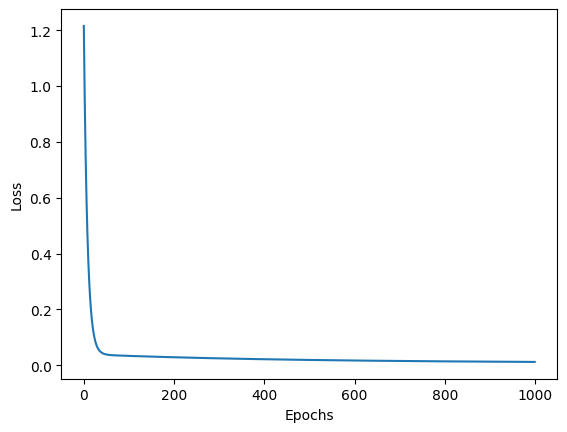

In [166]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### **Testing with test data**

Load and apply all the preprocessing steps used in the training data for the testing data as well. Remember to use the **SAME** min/max values which you used for the training set and not recalculate them from the test set. Also mention why we are doing this.

To load test data from GitHub, use the code below.


In [167]:
# Do NOT scale SalePrice for the test set
df_test = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/test_processed_splitted.csv')
y_test_original = df_test['SalePrice'].to_numpy().reshape(-1, 1)


In [168]:
print(df_test)

# Let's find all the columns that are missing in the test set
missing_cols = set(df.columns) - set(df_test.columns)

# Add these columns to the test set with all zeros
for col in missing_cols:
    df_test[col] = 0

if 'Utilities_AllPub' not in df_test.columns:
    df_test = df_test.join(pd.get_dummies(df_test['Utilities'], dtype = 'int32', prefix = 'Utilities'))
    df_test = df_test.drop('Utilities', axis = 1)



     LotArea  TotalBsmtSF  GrLivArea  GarageArea  PoolArea  OverallCond  \
0      15623         2396       4476         813       555            5   
1      11952          808       1969         534         0            6   
2       7558          896       1913         342         0            6   
3       6762         1187       1208         632         0            5   
4       8529         1454       1434         527         0            5   
..       ...          ...        ...         ...       ...          ...   
141     9135         1536       1536         532         0            5   
142    11639         1428       1428         480         0            5   
143    11475         1584       1776         888         0            5   
144     5925          907       1131         672         0            7   
145    14559         1008       1363         288         0            7   

    Utilities  SalePrice  
0      AllPub     745000  
1      AllPub     190000  
2      AllPub     

Using the weights learnt above, predict the values in the test dataset. Also answer the following questions:
- Are the predictions good?
- What is the MSE loss for the testset
- Is the MSE loss for testing greater or lower than training
- Why is this the case

In [169]:
# 1. Fill NaNs
df_test.fillna(0, inplace=True)

# 2. Remove duplicated columns if any
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

# 3. One-hot encode Utilities ONLY if training also had it
# (Assuming training had 'Utilities_AllPub' and 'Utilities_NoSeWa')
if 'Utilities' in df_test.columns:
    utilities_dummy = pd.get_dummies(df_test['Utilities'], prefix='Utilities', dtype='int32')
    df_test = pd.concat([df_test.drop('Utilities', axis=1), utilities_dummy], axis=1)

# 4. Reindex test columns to EXACT training feature order
train_feature_cols = df.drop('SalePrice', axis=1).columns  # columns used in training
df_test = df_test.reindex(columns=list(train_feature_cols) + ['SalePrice'], fill_value=0)

# 5. Scale numeric columns using training min/max
train_min = df_encoded[numeric_cols].min()
train_max = df_encoded[numeric_cols].max()
for col in numeric_cols:
    df_test[col] = (df_test[col] - train_min[col]) / (train_max[col] - train_min[col])

# 6. Convert to numpy
x_test = df_test.drop('SalePrice', axis=1).to_numpy()
y_test = df_test['SalePrice'].to_numpy().reshape(-1, 1)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# 7. Predict
y_pred_test = x_test @ W + b

# 8. Test MSE
test_mse = mse_loss_fn(y_test, y_pred_test)
print("Test MSE:", test_mse)


x_test shape: (146, 7)
y_test shape: (146, 1)
Test MSE: 42178632903.24622


In [170]:
extra_cols = list(set(df_test.columns) - set(df.columns))
print("Extra columns in df_test:", extra_cols)

missing_cols = list(set(df.columns) - set(df_test.columns))
print("Missing columns in df_test:", missing_cols)

Extra columns in df_test: []
Missing columns in df_test: []


In [171]:
# Use the training set's min/max to un-normalize model outputs (model was trained with train-scaling)
y_min_train = df['SalePrice'].min()
y_max_train = df['SalePrice'].max()

# Predictions in normalized space (as produced by your model)
y_pred_test = x_test @ W + b  # shape (n_test, 1)

# Un-normalize predictions using TRAIN min/max
y_pred_original = y_pred_test * (y_max_train - y_min_train) + y_min_train

# Ground-truth SalePrice from df_test (original scale)
y_test_original = df_test['SalePrice'].to_numpy().reshape(-1, 1)

# MSE and examples in real dollars
real_mse = mse_loss_fn(y_test_original, y_pred_original)
print("Test MSE (original scale):", real_mse)

for i in range(10):
    print(f"Predicted: {y_pred_original[i,0]:.2f}   Actual: {y_test_original[i,0]:.2f}")


Test MSE (original scale): 7494196970.6533
Predicted: 299811.75   Actual: 745000.00
Predicted: 227082.05   Actual: 190000.00
Predicted: 145687.55   Actual: 177000.00
Predicted: 225577.50   Actual: 206000.00
Predicted: 191918.27   Actual: 189000.00
Predicted: 145943.22   Actual: 110000.00
Predicted: 73839.26   Actual: 119000.00
Predicted: 228095.04   Actual: 179600.00
Predicted: 206375.10   Actual: 185000.00
Predicted: 221876.84   Actual: 191000.00


In [172]:
y_pred_original = y_pred_original.astype(float)
y_test_original = y_test_original.astype(float)


In [173]:
idx = np.random.randint(0, x_test.shape[0], 5)

y_pred_test_sample = np.rint(y_pred_original[idx]).astype(int)
y_true_test_sample = np.rint(y_test_original[idx]).astype(int)

print("Predicted:", y_pred_test_sample.squeeze().tolist())
print("Actual:   ", y_true_test_sample.squeeze().tolist())


Predicted: [246630, 227082, 163442, 68367, 179199]
Actual:    [231500, 190000, 208900, 100000, 84000]
